In [ ]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math


# Utils for Policy Itaration and Value Iteration

In [ ]:
### MDP Value Iteration and Policy Iteration
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import gym
import time
import seaborn as sns


np.set_printoptions(precision=6)

def policy_evaluation(P, nS, nA, policy, gamma=0.9, tol=1e-3):
    value_function = np.zeros(nS) 
    while True:
        delta = 0
        for s in range(nS):
            v = value_function[s]
            temp = P[s][policy[s]]
            new_value = 0
            for k in temp:
                new_value += k[0]*(k[2] + gamma*value_function[k[1]])
            value_function[s] = new_value
            delta = max(delta, abs(v - value_function[s]))
        if delta <= tol:
            break
    return value_function


def policy_improvement(P, nS, nA, value_from_policy, policy, gamma=0.9):
    new_policy = np.zeros(nS, dtype='int')
    for s in range(nS):
        old_action = policy[s]
        max_action = old_action
        max_action_value = 0 
        for k in (P[s][old_action]):
            max_action_value += k[0]*(k[2] + gamma*value_from_policy[k[1]])
        for a in range(nA):
            current_action_value = 0
            for k in (P[s][a]):
                current_action_value += k[0]*(k[2] + gamma*value_from_policy[k[1]])
            if current_action_value > max_action_value:
                max_action = a
                max_action_value = current_action_value
        new_policy[s] = max_action
    return new_policy


def policy_iteration(P, nS, nA, gamma=0.9, tol=10e-3,max_itr=50):
    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)
    new_policy = np.zeros(nS, dtype=int)
    record = []
    record.append(value_function)
    success_rate = []
    counter = 0
    while counter < max_itr:
        counter += 1
        policy_stable = True
        value_function = policy_evaluation(P, nS, nA, policy)
        record.append(value_function)
        policy = new_policy.copy()
        value_from_policy = policy_evaluation(P, nS, nA, policy)
        new_policy = policy_improvement(P, nS, nA, value_from_policy, policy)
        # test the policy for each iteration
        success_rate.append(testPolicy(policy))
        """
        for s in range(nS):
            if(policy[s] != new_policy[s]):
                policy_stable = False
                break      
        if policy_stable == True:
            break
        """
    return value_function, new_policy, record, success_rate


def value_iteration(P, nS, nA, gamma=0.9, tol=1e-3,max_itr=50):
    value_function = np.zeros(nS)
    policy = np.zeros(nS, dtype=int)
    new_policy = np.zeros(nS, dtype=int)
    record = []
    record.append(value_function.copy()) 
    success_rate = []
    counter = 0
    while counter < max_itr:
        counter += 1
        delta = 0
        policy = new_policy
        for s in range(nS):
            v = value_function[s]
            temp = P[s][policy[s]]
            old_action = policy[s]
            max_action_value = 0
            max_action = old_action
            for k in (P[s][old_action]):
                max_action_value += k[0]*(k[2] + gamma*value_function[k[1]])
            for a in range(nA):
                current_action_value = 0
                for k in (P[s][a]):
                    current_action_value += k[0]*(k[2] + gamma*value_function[k[1]])
                if current_action_value > max_action_value:
                    max_action_value = current_action_value
                    max_action = a
            value_function[s] = max_action_value
            new_policy[s] = max_action
            delta = max(delta, abs(v - value_function[s]))
        record.append(value_function.copy())
        success_rate.append(testPolicy(policy))
        #if delta <= tol:
         #   break
        
    return value_function, new_policy, record, success_rate

def render_single(env, policy, max_steps=100):
  """
    This function does not need to be modified
    Renders policy once on environment. Watch your agent play!

    Parameters
    ----------
    env: gym.core.Environment
      Environment to play on. Must have nS, nA, and P as
      attributes.
    Policy: np.array of shape [env.nS]
      The action to take at a given state
  """

  episode_reward = 0
  ob = env.reset()
  for t in range(max_steps):
    env.render()
    time.sleep(0.25)
    a = policy[ob]
    ob, rew, done, _ = env.step(a)
    episode_reward += rew
    if done:
      break
  env.render();
  if not done:
    print("The agent didn't reach a terminal state in {} steps.".format(max_steps))
  else:
      print("Episode reward: %f" % episode_reward)

def testPolicy(policy, trials=100):
    """
    Get the average rate of successful episodes over given number of trials
    : param policy: function, a deterministic policy function
    : param trials: int, number of trials
    : return: float, average success rate
    """
    env = gym.make("FrozenLake-v0")
    env.reset()
    success = 0

    for _ in range(trials):
        done = False
        state = env.reset()
        while not done:
            action = policy[state]
            state, _, done, _ = env.step(action)
            if state == 15:
                success += 1

    avg_success_rate = success / trials
    return avg_success_rate

def plot(V, nS, name="Plot"):
    nIter = len(V)
    x_range = np.arange(1, nS + 1)
    y_range = np.arange(1, nIter + 1)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.apply_along_axis(lambda x: V[x[1] - 1][x[0] - 1], 2, np.dstack([X, Y]))
    #print(Z)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('coolwarm'), vmax=1.0)
    ax.set_xlabel('State')
    ax.set_ylabel('Iteration')
    ax.set_zlabel('Discounted Reward/Return')
    ax.set_title(name)
    ax.view_init(30, 240)
    fig.colorbar(surf)

def plotscore(success_rate, title):
    """
    Plots for success rate over every iteration
    :param success_rate: list, a list of success rate
    :param title: str, plot title
    """
    plt.figure(figsize=(10,10))
    plt.plot(success_rate)
    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel("Success rate")
    plt.savefig(title + ".png", dpi=150)
    plt.show()

def plot_env(worlds, title, episodes= None):
  # define the figure and axes
  num_rows = 4
  num_cols = 4

  fig, ax = plt.subplots(figsize=(20,15), 
                        nrows=num_rows, 
                        ncols=num_cols)
  # add a figure title
  fig.suptitle(title, 
              fontsize=21)
  #use a for loop to create each subplot:
  counter = 0
  epi = False
  try:
    length = len(episodes)
    epi = True
  except:
    epi = False

  for row in range(num_rows):
    for col in range(num_cols):
      #print(episodes)
      
      if epi:
          index = episodes[counter]
      else:
          index = counter
      sns.heatmap(worlds[index],ax=ax[row,col], cmap = "Blues", annot=True, linewidths=.5, square = True, cbar = False)
      
      ax[row, col].set_xlabel("grid x",
                              fontsize=8)
      ax[row, col].set_ylabel('grid y' ,
                              fontsize=8)
      ax[row, col].set_title(index,
                              fontsize=10)
      counter +=1
  plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3)   

def plot_optimum(Values, Policy,env,title):
  states = np.asarray(env.desc, dtype="str")
  mapping = {"S" : "start", "F":"frozen","H":"hole","G": "goal"}
  grid = 4
  f, ax = plt.subplots(figsize=(11, 9))
  #cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
  reshaped=np.reshape(Values,(grid,grid))
  seaborn.heatmap(reshaped, cmap="Blues", vmax=1.1,
              square=True, xticklabels=grid+1, yticklabels=grid+1,
              linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
  policy_int = Policy
  counter=0
  for j in range(0, 4):
      for i in range(0, 4):
          s = states[j,i]
          new = mapping[s]
          plt.text(i+0.2, j+0.2, new, fontsize=12) 

          if policy_int[counter]==1:
              plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
          elif policy_int[counter]==3:
              plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
          elif policy_int[counter]==0:
              plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
          else:
              plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
          counter=counter+1

  plt.title(title)
  #print('Value Function',value_func)
  #print('Policy',policy_int)
  plt.show()

# Policy Iteration


-------------------------
Beginning Policy Iteration
-------------------------


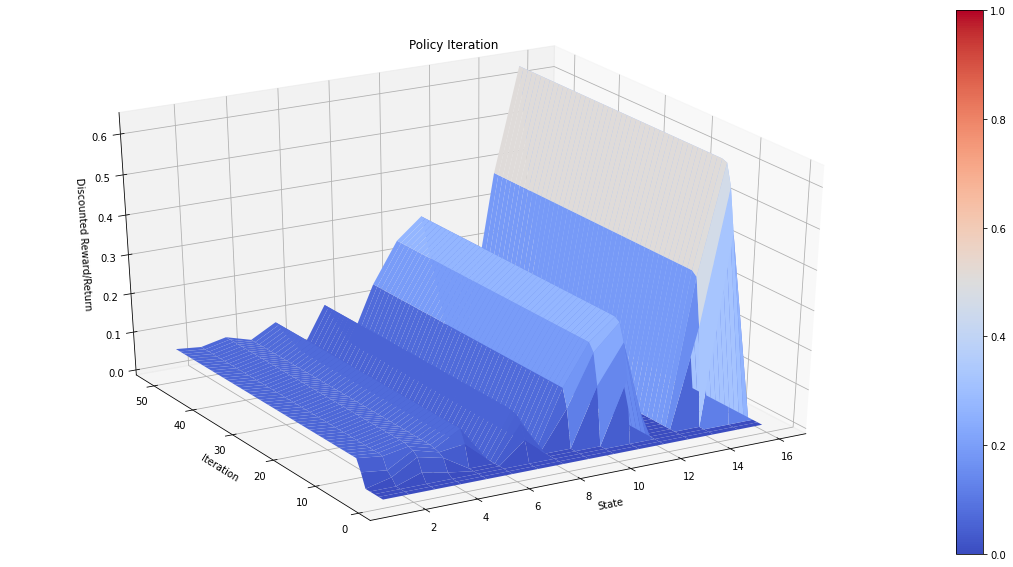

In [ ]:

env = gym.make("FrozenLake-v0")
env.reset()

print("\n" + "-"*25 + "\nBeginning Policy Iteration\n" + "-"*25)

V_pi, p_pi, record_pi,success_rate = policy_iteration(env.P, env.nS, env.nA, gamma=0.9, tol=1e-3,max_itr=50)
#render_single(env, p_pi, 100)
plot(record_pi, env.nS,"Policy Iteration")
# print(V_pi)
# print(p_pi)

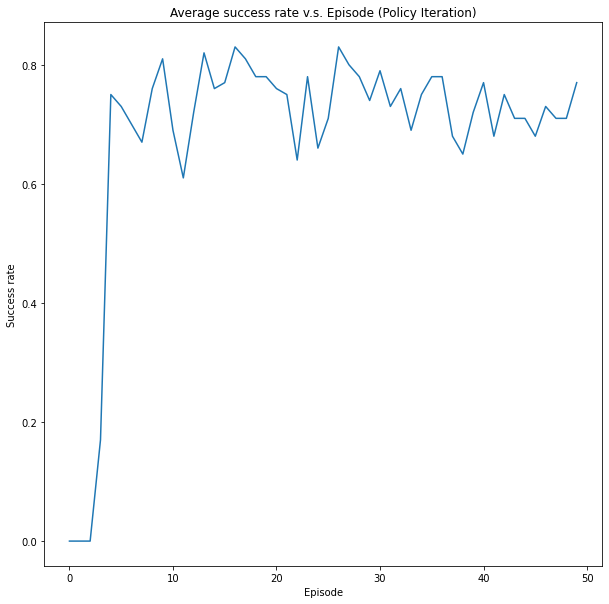

In [ ]:
plotscore(success_rate, "Average success rate v.s. Episode (Policy Iteration)")

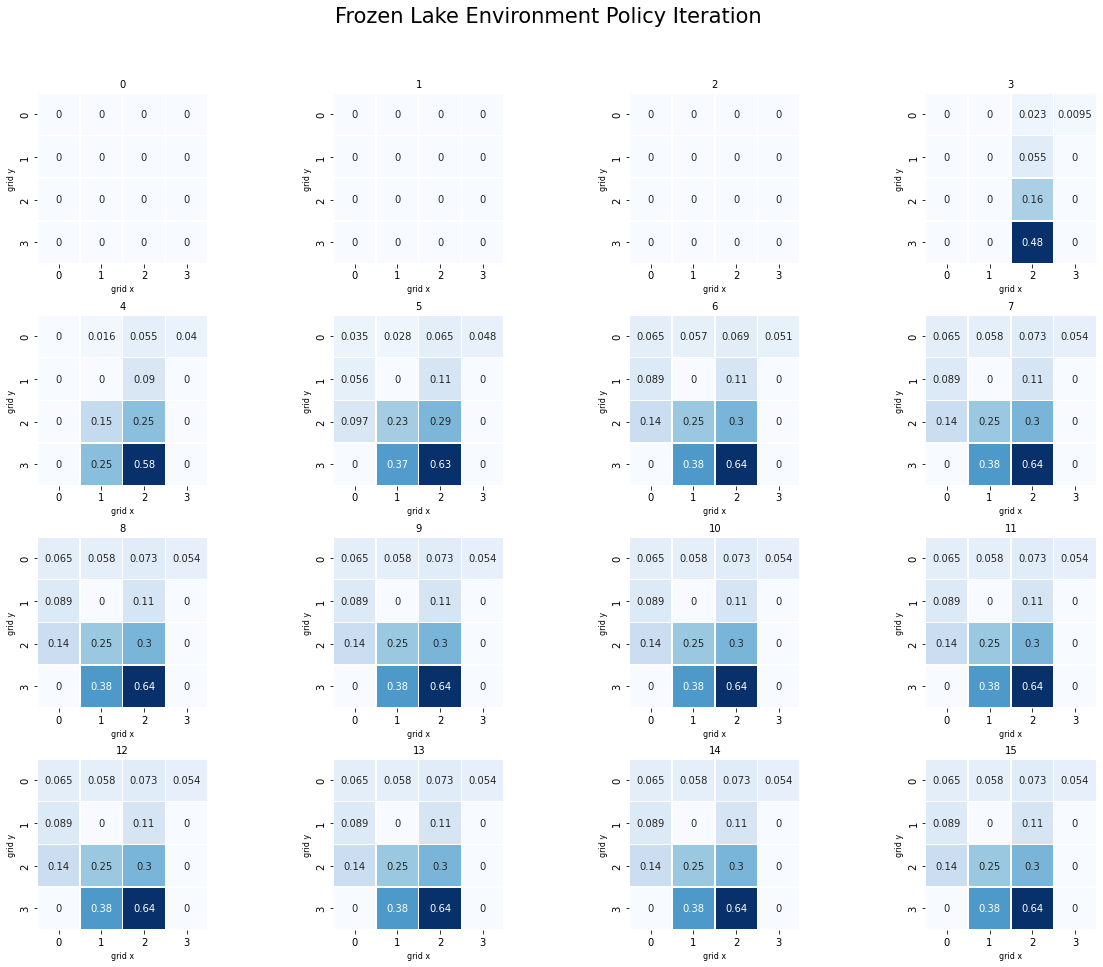

In [ ]:

worlds = []
for i in range(len(record_pi)):
  state = record_pi[i].reshape(4,4)
  worlds.append(state)

plot_env(worlds, "Frozen Lake Environment Policy Iteration")

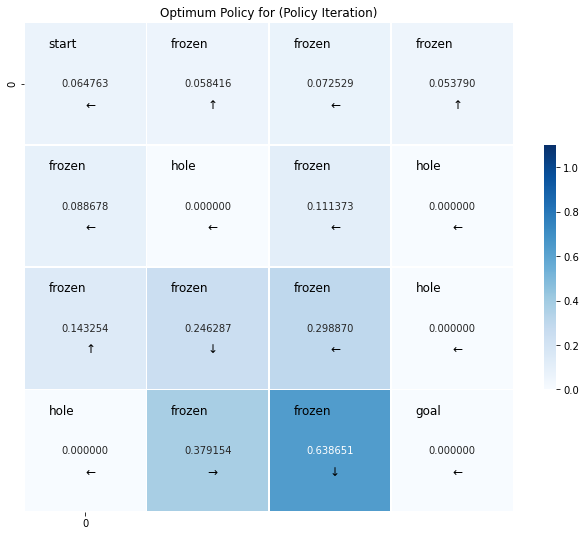

In [ ]:
plot_optimum(V_pi, p_pi,env, "Optimum Policy for (Policy Iteration)")


# Value Iteration


-------------------------
Beginning Value Iteration
-------------------------


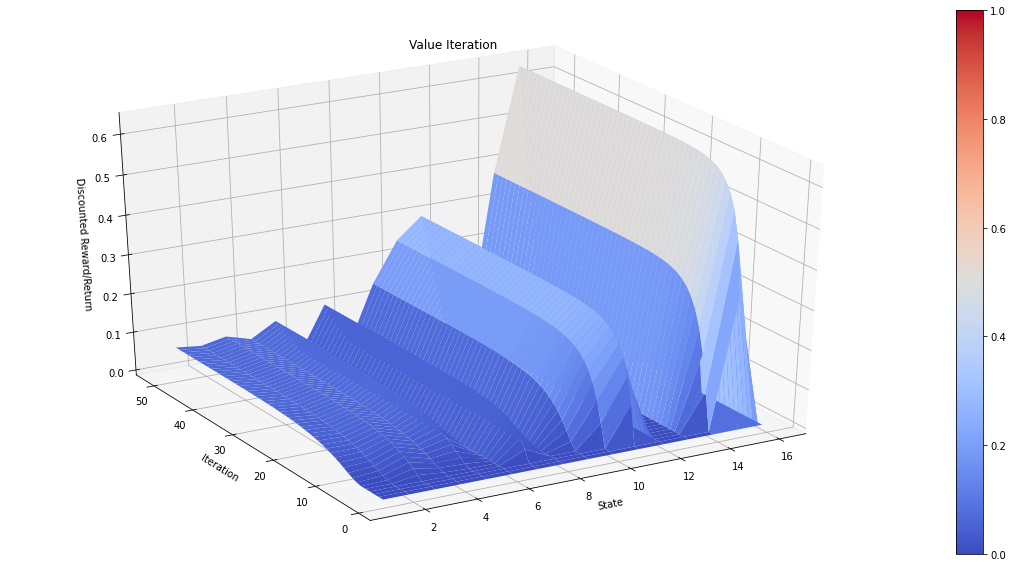

In [ ]:

env = gym.make("FrozenLake-v0")
env.reset()


print("\n" + "-"*25 + "\nBeginning Value Iteration\n" + "-"*25)

V_vi, p_vi, record_vi, success_rate = value_iteration(env.P, env.nS, env.nA, gamma=0.9, tol=1e-3,max_itr=50)
#render_single(env, p_vi, 100)
# print(V_pi)
# print(p_pi)
plot(record_vi, env.nS,"Value Iteration")

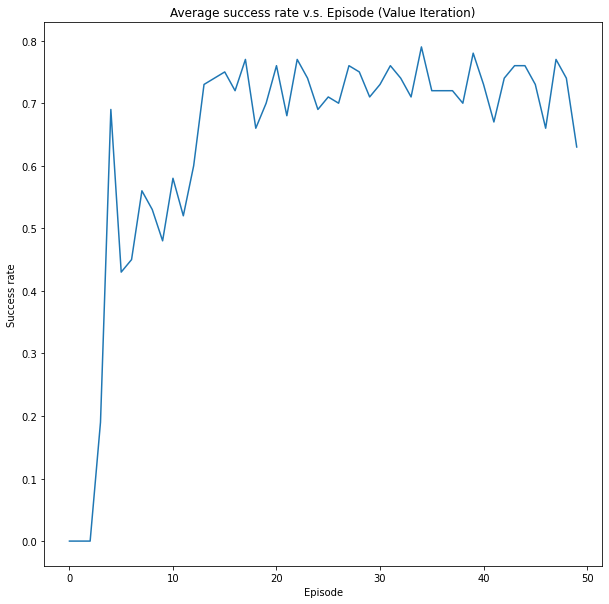

In [ ]:
# plot
plotscore(success_rate, "Average success rate v.s. Episode (Value Iteration)")

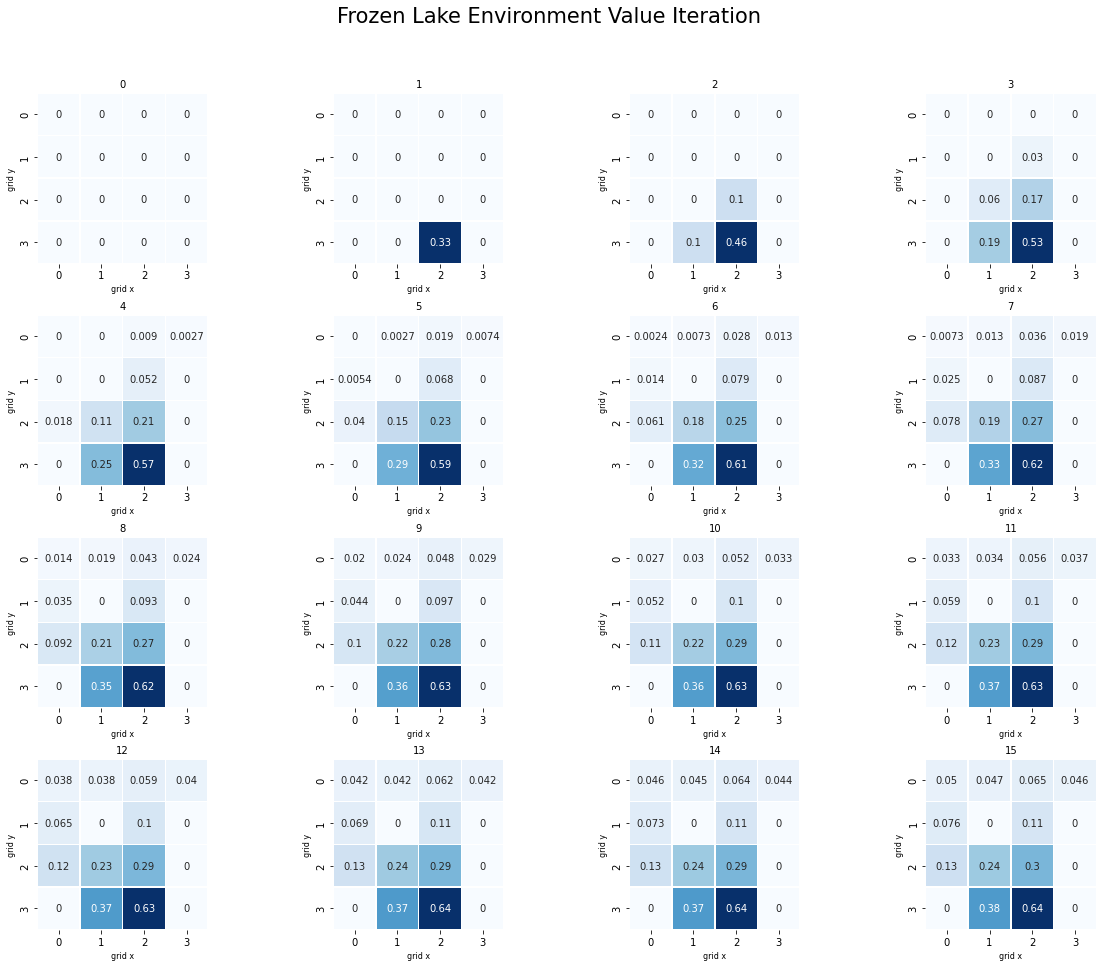

In [ ]:

worlds = []
for i in range(len(record_vi)):
  state = record_vi[i].reshape(4,4)
  worlds.append(state)

plot_env(worlds, "Frozen Lake Environment Value Iteration")

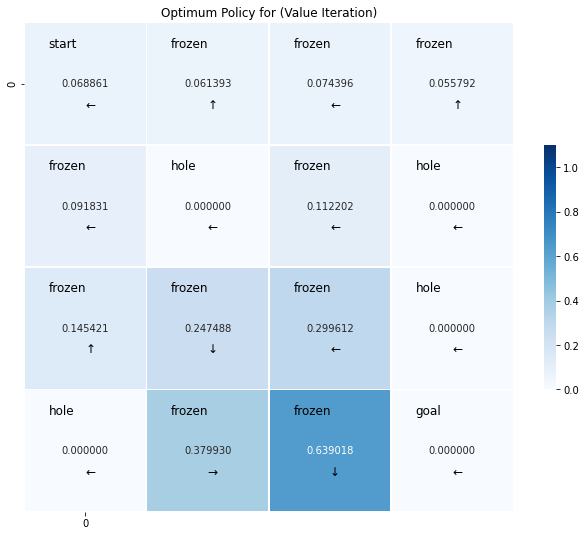

In [ ]:
plot_optimum(V_vi, p_vi,env, "Optimum Policy for (Value Iteration)")

# Q Learning

In [ ]:
def plot_rewards(name, y, window=1):
    i = 0
    new_y = []
    while i < len(y):
        new_y.append(np.mean(y[i: i+window]))
        i += window
    plt.plot(new_y)
    plt.ylabel(name)
    plt.show()

In [ ]:
env.desc.flatten()[15]

b'G'

In [ ]:
env = gym.make("FrozenLake-v0")
env.reset()

nS = env.observation_space.n
nA = env.action_space.n
Q = np.zeros((nS, nA))

epsilon = 0.8
episodes = 2000
alpha = 0.2
gamma = 0.9

rewards = []
success_rate =[]
records = []

for episode in range(episodes):
  if episode == 500:
        epsilon = 0.05
        alpha = 0.05
  elif episode == 900:
        epsilon = 0.0001
        alpha = 0.001
  state = env.reset()
  done = False
  cum_reward = 0
  steps = 0 
  while not done:
    if np.random.random() < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state,:])
    
    next_state, reward, done, info = env.step(action)
    #print(reward)
    cum_reward += reward

    Q[state,action] += alpha * (reward + gamma * np.max(Q[next_state,:])
                        - Q[state,action])
    state = next_state
    steps += 1

  policy = np.zeros(16, dtype=int)
  for i in range(Q.shape[0]):
    action = np.argmax(Q[i,:])
    policy[i] = int(action)  
  
  V = np.array([max(Q[s]) for s in range(env.nS)])
  records.append(V)
  success_rate.append(testPolicy(policy,trials=50))
  #print(success_rate)

  rewards.append(cum_reward)

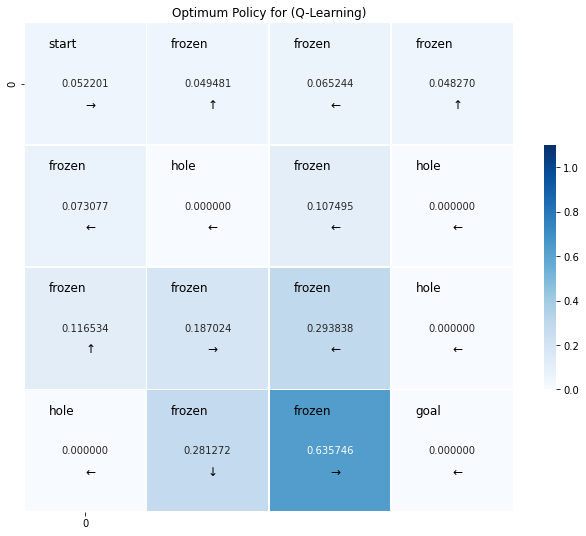

In [ ]:
policy = [np.argmax(Q[s]) for s in range(env.nS)]
V = [max(Q[s]) for s in range(env.nS)]

plot_optimum(V, policy,env, "Optimum Policy for (Q-Learning)")

Text(0.5, 1.0, 'Cumulative rewards by Episode')

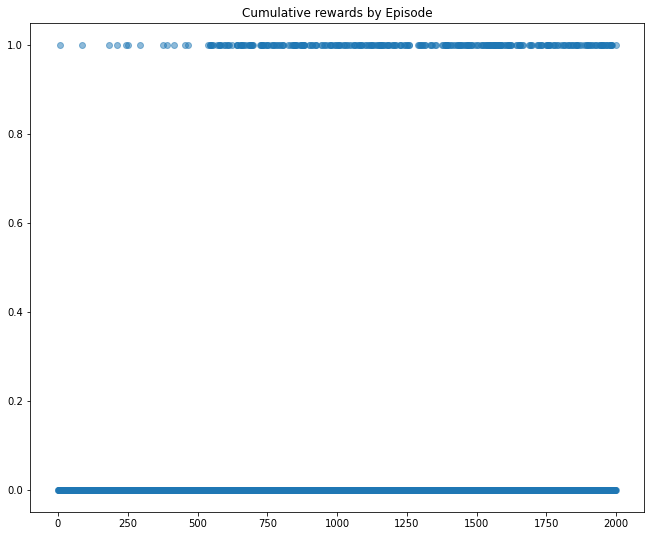

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
ax.scatter(np.arange(len(rewards)),rewards, alpha = 0.5)
ax.set_title("Cumulative rewards by Episode")

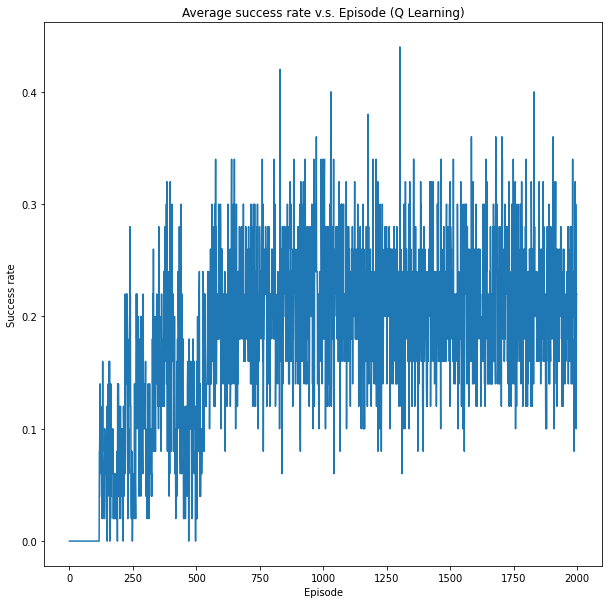

In [ ]:
# plot
plotscore(success_rate, "Average success rate v.s. Episode (Q Learning)")

[  0  66 133 199 266 333 399 466 532 599 666 732 799 865 932 999]


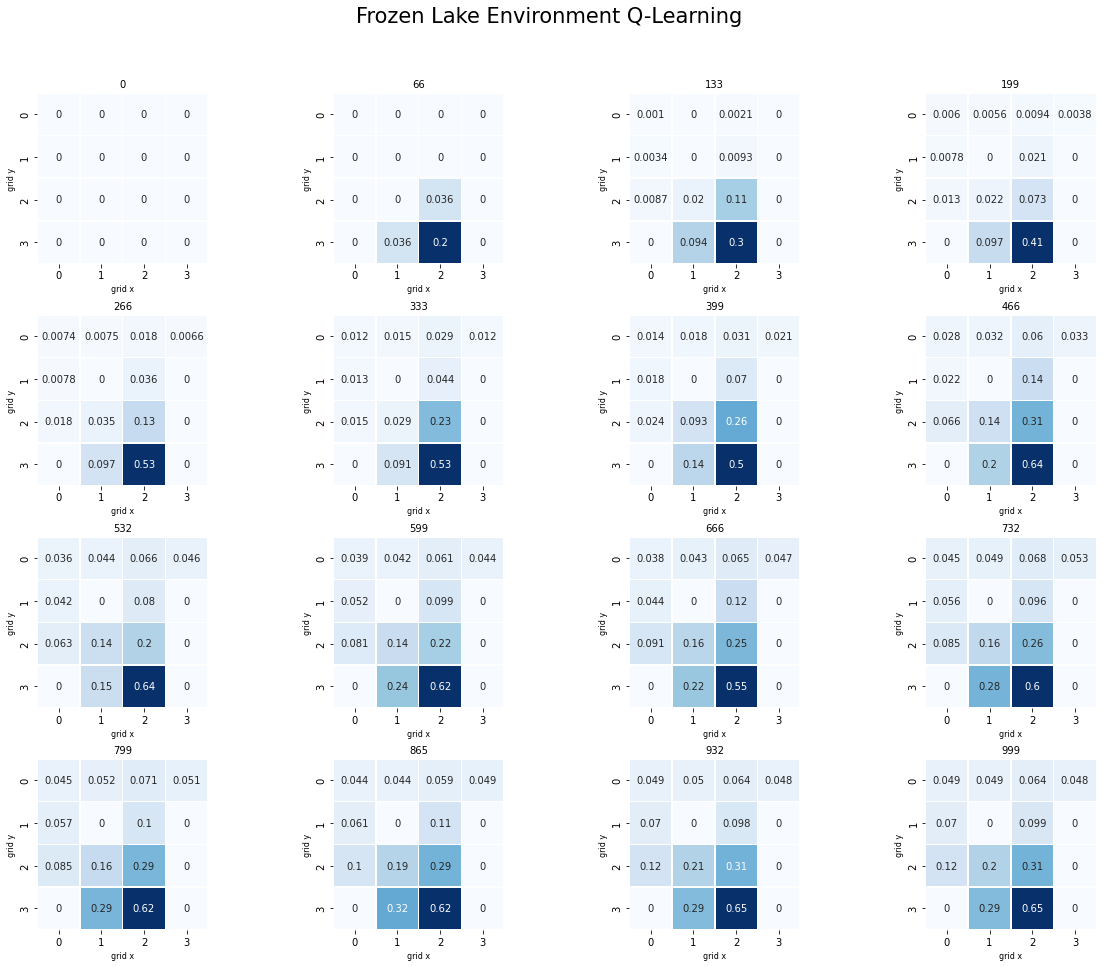

In [ ]:

worlds = []
for i in range(len(records)):
  state = records[i].reshape(4,4)
  worlds.append(state)
indices = np.floor(np.linspace(0,999,16)).astype(int)
print(indices)
plot_env(worlds, "Frozen Lake Environment Q-Learning", episodes=indices)

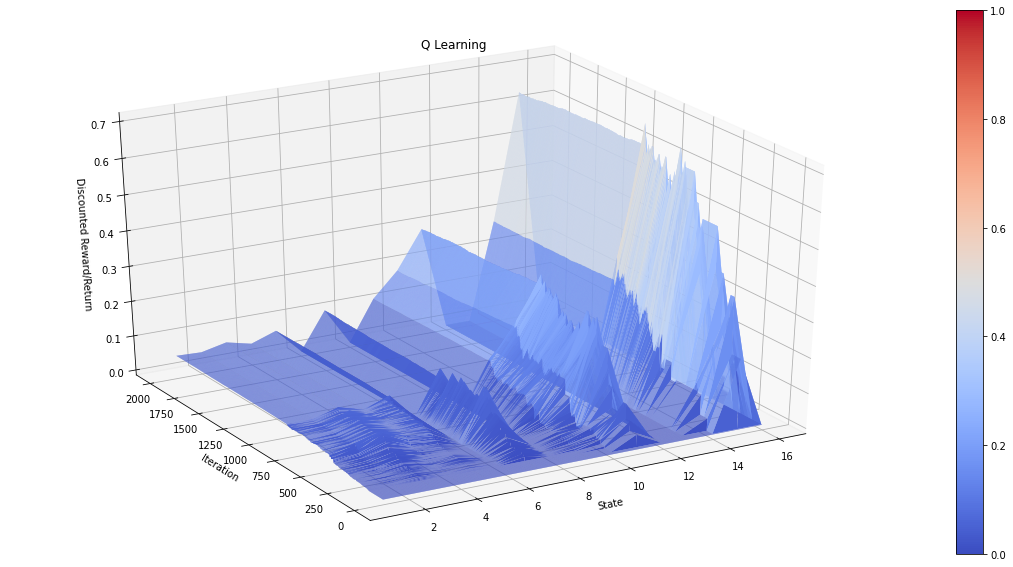

In [ ]:
plot(records, env.nS,"Q Learning")